# Logistic Regression

### 0. Iris flower dataset (*)
In the whole exercise, we will work with the famous Iris flower dataset, which was collected in 1936 by Ronald Fisher, a statistician and biologist. Use the datasets module from scikit-learn to load the iris dataset.

  a) Check keys on the loaded data and check what the different values for each key are.

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [84]:
#print(f"Data: {iris['data']}")
print(f"Frame: {iris['frame']}")
print(f"Target: {iris['target']}")
print(f"Target Names: {iris['target_names']}")
print(f"Feature Names: {iris['feature_names']}")
print(f"File Name: {iris['filename']}")
print(f"Data Module: {iris['data_module']}")

Frame: None
Target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Target Names: ['setosa' 'versicolor' 'virginica']
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
File Name: iris.csv
Data Module: sklearn.datasets.data


In [71]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

b) Now insert the data into a DataFrame.

In [86]:
iris_X = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_y = pd.DataFrame(iris.target)
iris_X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [92]:
iris_y.rename({0:"Type"}, axis=1, inplace=True)
iris_y

,Type
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


c) Do some EDA to get an understanding of the dataset.

In [93]:
iris_X.info() #No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [94]:
iris_X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [95]:
iris_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Type    150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


d) Make a correlation heatmap to see how each feature is correlated to each other. What do the numbers mean?

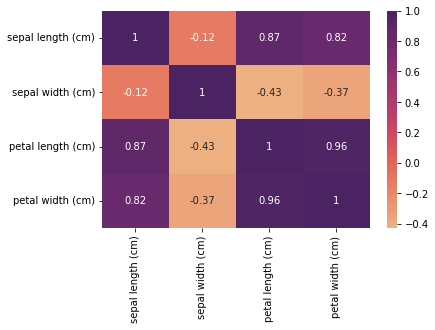

In [103]:
_ = sns.heatmap(iris_X.corr(), cmap="flare", annot=True)

The numbers represent the Pearson correlation coefficient (Pearson's _r_).

e) Make a boxplot. The points outside of the boxplot are statistically calculated outliers using Tukey's rule for boxplot.

In [117]:
iris_full = iris_X.join(iris_y)
iris_full.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


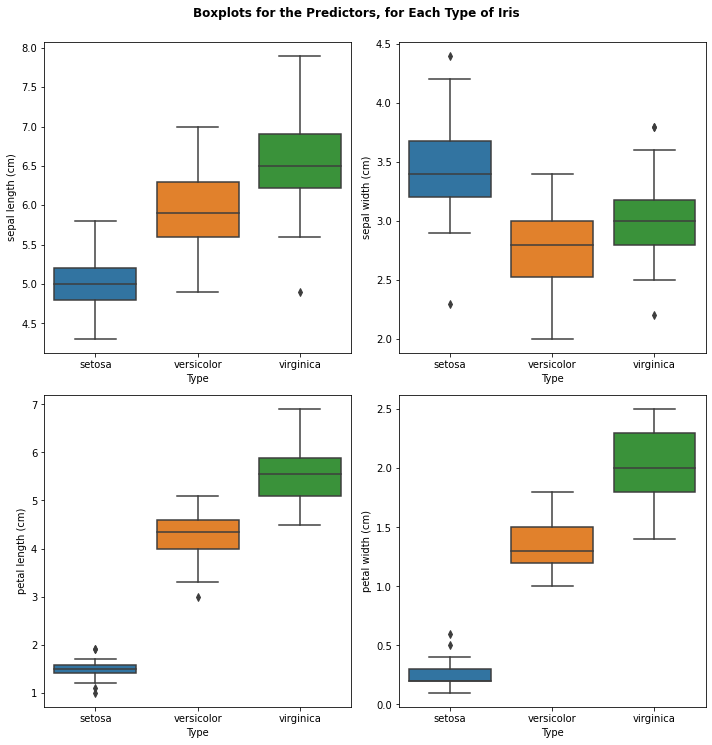

In [137]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for ax, col in zip(axes.flatten(), iris_full.columns):
    sns.boxplot(data=iris_full, x="Type", y=col, ax=ax)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["setosa", "versicolor", "virginica"])

fig.tight_layout()
_ = fig.suptitle("Boxplots for the Predictors, for Each Type of Iris", y=1.03, fontweight="bold")

f) Now remove the outliers in data. (**)

- Lower bound outlier: $Q_1 - 1.5\cdot IQR$
- Upper bound outlier: $Q_3 + 1.5\cdot IQR$

where $Q_1$ is the 1st quartile or 25 percentile, $Q_3$ is the 3rd quartile or 75 percentile and $IQR = Q_3-Q_1$ is the interquartile range. 

In [200]:
def is_outlier(variable):

    outlier_index = []

    Q1 = variable.quantile(0.25)
    Q3 = variable.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    for observation, index in zip(variable, variable.index):
        if observation > upper_bound or observation < lower_bound:
            outlier_index.append(index)
    
    return outlier_index

In [228]:
setosa = iris_full[iris_full["Type"] == 0].drop("Type", axis=1)
versicolor = iris_full[iris_full["Type"] == 1].drop("Type", axis=1)
virginica = iris_full[iris_full["Type"] == 2].drop("Type", axis=1)

outliers = []

for flower_type in [setosa, versicolor, virginica]:
    
    outliers_per_flower = []
    
    for column in flower_type.columns:
        outliers_per_flower.extend(is_outlier(flower_type[column]))
    
    outliers.extend(outliers_per_flower)

outliers.sort()
outliers    

[13, 15, 22, 23, 24, 41, 43, 44, 98, 106, 117, 119, 131]

In [231]:
iris_reduced = iris_full.drop(outliers, axis=0)

In [232]:
iris_reduced

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 1. Split and scale data (*)

Do train|test split and scale the data using feature standardization, I used default test size 0.33 and random state 42. Check the mean and standard deviation on training and test data.